In [80]:
#Importing Packages
import geopandas as gp
import pandas as pd
import os
import json
import csv
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [81]:
sat_score = pd.read_csv('SAT_Results.csv')
print sat_score.columns

Index([u'DBN', u'SCHOOL NAME', u'Num of SAT Test Takers',
       u'SAT Critical Reading Avg. Score', u'SAT Math Avg. Score',
       u'SAT Writing Avg. Score', u'District', u'SAT Total AVERAGE'],
      dtype='object')


In [82]:
print sat_score.head()

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

   Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                      29                              355   
1                      91                              383   
2                      70                              377   
3                       7                              414   
4                      44                              390   

   SAT Math Avg. Score  SAT Writing Avg. Score  District  SAT Total AVERAGE  
0                  404                     363         1                374  
1                  423                     366         1                391  
2                  402          

In [102]:
print sat_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 420
Data columns (total 8 columns):
DBN                                421 non-null object
SCHOOL NAME                        421 non-null object
Num of SAT Test Takers             421 non-null int64
SAT Critical Reading Avg. Score    421 non-null int64
SAT Math Avg. Score                421 non-null int64
SAT Writing Avg. Score             421 non-null int64
District                           421 non-null int64
SAT Total AVERAGE                  421 non-null int64
dtypes: int64(6), object(2)
memory usage: 29.6+ KB
None


In [95]:
Output_SAT = sat_score.groupby('District').mean()

In [96]:
class_size = pd.read_csv('2010-2011_Class_Size_-_School-level_detail.csv')

In [86]:
print class_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                  27611 non-null int64
BOROUGH                              27611 non-null object
SCHOOL CODE                          27611 non-null object
SCHOOL NAME                          27611 non-null object
GRADE                                26127 non-null object
PROGRAM TYPE                         26127 non-null object
CORE SUBJECT                         26127 non-null object
CORE COURSE                          26127 non-null object
SERVICE CATEGORY                     26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED    26127 non-null float64
NUMBER OF SECTIONS                   26127 non-null float64
AVERAGE CLASS SIZE                   26127 non-null float64
SIZE OF SMALLEST CLASS               26127 non-null float64
SIZE OF LARGEST CLASS                26127 non-null float64
DATA SOURCE                          26127 non-null object
SC

In [97]:
classsize = class_size.groupby(['CSD','GRADE','CORE SUBJECT']).mean()

In [98]:
attendance = pd.read_csv('School_Attendance_And_Enrollment_By_District_-_2010-11.csv')

In [99]:
print attendance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 4 columns):
Dist                      33 non-null object
YTD % Attendance (Avg)    33 non-null float64
YTD Enrollment (Avg)      33 non-null int64
District                  33 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB
None


In [100]:
attendance

,Dist,YTD % Attendance (Avg),YTD Enrollment (Avg),District
0,DISTRICT 01,91.18,12367,1
1,DISTRICT 02,89.01,60823,2
2,DISTRICT 03,89.20,21962,3
3,DISTRICT 04,91.13,14252,4
4,DISTRICT 05,89.08,13170,5
5,DISTRICT 06,91.34,25733,6
6,DISTRICT 07,86.75,19717,7
7,DISTRICT 08,87.15,31625,8
8,DISTRICT 09,89.27,34518,9
9,DISTRICT 10,88.92,56757,10


In [92]:
english_score = pd.read_csv('English_Language_Arts__ELA__Test_Results_2006-2012_-_District_-_All_Students.csv')

In [28]:
english_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 16 columns):
District             1568 non-null int64
Grade                1568 non-null object
Year                 1568 non-null int64
Demographic          1568 non-null object
Number Tested        1568 non-null int64
Mean Scale Score     1568 non-null int64
Num Level 1          1568 non-null int64
Pct Level 1          1568 non-null float64
Num Level 2          1568 non-null int64
Pct Level 2          1568 non-null float64
Num Level 3          1568 non-null int64
Pct Level 3          1568 non-null float64
Num Level 4          1568 non-null int64
Pct Level 4          1568 non-null float64
Num Level 3 and 4    1568 non-null int64
Pct Level 3 and 4    1568 non-null float64
dtypes: float64(5), int64(9), object(2)
memory usage: 208.2+ KB


In [103]:
englishscore = english_score.groupby(['District' , 'Grade' , 'Year']).mean()

In [30]:
math_score = pd.read_csv('NYS_Math_Test_Results_By_Grade_2006-2011_-_District_-_All_Students.csv')

In [31]:
mathscore = math_score.groupby(['District' , 'Grade' , 'Year']).mean()

Number Tested  Mean Scale Score  Level 1 #  \
District Grade      Year                                               
1        3          2006            936               673         73   
                    2007            836               679         48   
                    2008            862               686         17   
                    2009            914               691          8   
                    2010            866               697         89   
                    2011            826               689         78   
         4          2006            895               670         80   
                    2007            868               673         68   
                    2008            848               677         44   
                    2009            846               685         55   
                    2010            906               687         59   
                    2011            865               690         54   
         5          2006            798               657        110   
                    2007            870               668         67   
                    2008            856               677         40   
                    2009            811               685         13   
                    2010            807               681         69   
                    2011            875               687         65   
         6          2006            912               659        116   
                    2007            795               667         88   
                    2008            869               672         79   
                    2009            895               682         41   
                    2010            801               685         74   
                    2011            828               685         80   
         7          2006            967               648        153   
                    2007            914               658         69   
                    2008            848               672         32   
                    2009            861               680         20   
                    2010            880               681         90   
                    2011            774               684         63   
...                                 ...               ...        ...   
32       5          2006           1521               649        250   
                    2007           1603               662        146   
                    2008           1529               669         77   
                    2009           1411               677         42   
                    2010           1372               676        108   
                    2011           1320               675        131   
         6          2006           1596               642        358   
                    2007           1568               655        225   
                    2008           1625               663        147   
                    2009           1576               670         81   
                    2010           1374               668        221   
                    2011           1405               671        218   
         7          2006           1580               629        451   
                    2007           1633               643        276   
                    2008           1570               658        110   
                    2009           1573               667         40   
                    2010           1525               665        225   
                    2011           1347               666        212   
         8          2006           1751               632        504   
                    2007           1566               635        444   
                    2008           1517               650        202   
                    2009           1590               662        106   
                    2010           1600               662        3

In [140]:
X = attendance['YTD % Attendance (Avg)'][0:32]
Y = Output['SAT Total AVERAGE'][0:32]

In [141]:
X.index = Y.index

In [138]:
X

District
1     91.18
2     89.01
3     89.20
4     91.13
5     89.08
6     91.34
7     86.75
8     87.15
9     89.27
10    88.92
11    89.84
12    87.33
13    89.56
14    89.41
15    91.27
16    85.55
17    89.67
18    89.83
19    87.81
20    92.77
21    90.50
22    92.57
23    86.98
24    92.21
25    91.90
26    93.34
27    89.88
28    91.70
29    92.14
30    92.79
31    90.98
32    89.28
Name: YTD % Attendance (Avg), dtype: float64

In [146]:
Z = sm.add_constant(X)
model = sm.OLS(Y, Z, drop='missing') # ignores entires where x or y is NaN
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:      SAT Total AVERAGE   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     32.21
Date:                Wed, 09 Dec 2015   Prob (F-statistic):           3.47e-06
Time:                        22:57:54   Log-Likelihood:                -142.22
No. Observations:                  32   AIC:                             288.4
Df Residuals:                      30   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const                   -583

In [148]:
type(Z)
#X.sort_values(inplace=True)

pandas.core.frame.DataFrame

In [144]:
# X = sm.add_constant(X)
# model = sm.OLS(Y, X, missing='drop') # ignores entires where x or y is NaN
# fit = model.fit()
# print fit.summary()
type(X)
type(Y)

pandas.core.series.Series

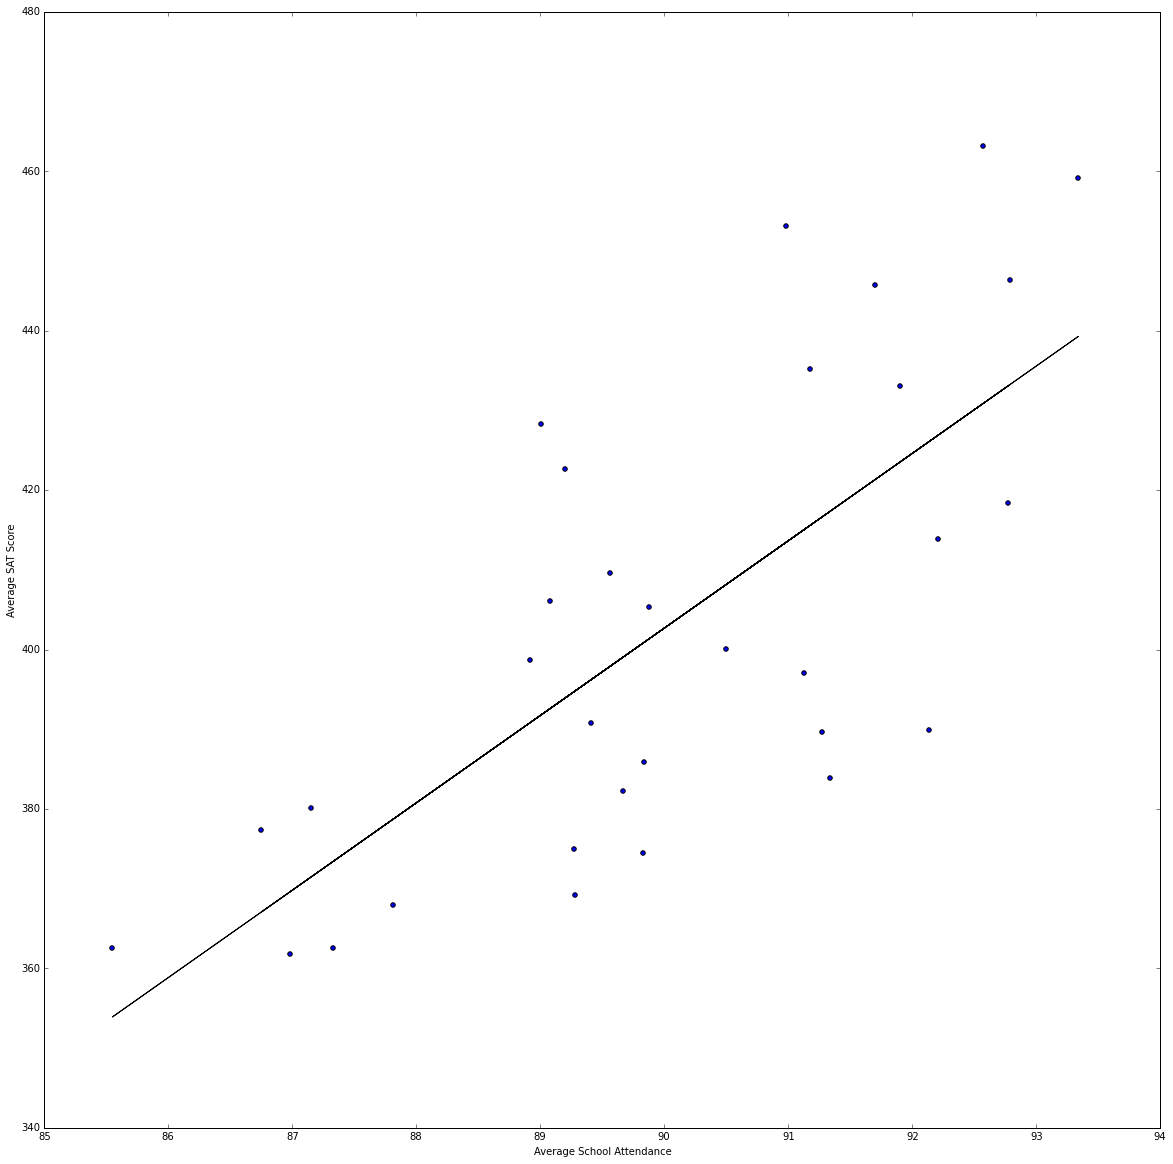

In [149]:
pl.figure(figsize=(20, 20))
pl.scatter(X, Y)
plot(X, fit.predict(), 'k')
pl.ylabel('Average SAT Score')
pl.xlabel('Average School Attendance')

In [150]:
classsize

NUMBER OF STUDENTS / SEATS FILLED  \
CSD GRADE   CORE SUBJECT                                        
1   0K      -                                       36.259259   
    0K-09   -                                       13.968750   
    1       -                                       31.964286   
    12-Sep  ENGLISH                                 75.788462   
            MATH                                    76.880952   
            SCIENCE                                111.347826   
            SOCIAL STUDIES                          95.488372   
    2       -                                       31.400000   
    3       -                                       31.115385   
    4       -                                       28.642857   
    5       -                                       31.000000   
    6       -                                       40.700000   
    7       -                                       41.277778   
    8       -                                       45.684211   
    MS Core ENGLISH                                 69.647059   
            MATH                                    60.840000   
            SCIENCE                                 62.166667   
            SOCIAL STUDIES                          62.714286   
2   0K      -                                       50.142857   
    0K-09   -                                       13.428571   
    1       -                                       49.351852   
    12-Sep  ENGLISH                                 96.162562   
            MATH                                   110.729167   
            SCIENCE                                155.793210   
            SOCIAL STUDIES                         128.934483   
    2       -                                       50.200000   
    3       -                                       48.562500   
    4       -                                       47.291667   
    5       -                                       49.978723   
    6       -                                       61.722222   
...                                                       ...   
31  12-Sep  SOCIAL STUDIES                         250.261364   
    2       -                                       59.428571   
    3       -                                       58.213333   
    4       -                                       56.986111   
    5       -                                       58.236111   
    6       -                                      157.320000   
    7       -                                      164.250000   
    8       -                                      174.260870   
    MS Core ENGLISH                                367.527778   
            MATH                                   268.391304   
            SCIENCE                                251.450980   
            SOCIAL STUDIES                         269.979167   
32  0K      -                                       56.142857   
    0K-09   -                                       22.833333   
    1       -                                       58.318182   
    12-Sep  ENGLISH                                 75.381818   
            MATH                                    83.277778   
            SCIENCE                                 88.152174   
            SOCIAL STUDIES                          89.928571   
    2       -                                       66.052632   
    3       -                                       61.473684   
    4       -                                       61.450000   
    5       -                                       62.315789   
    6       -                                       85.000000   
    7       -                                       89.714286   
    8       -                                      104.357143   
    MS Core ENGLISH                                237.384615   
            MATH                                   234.928571   
            SCIENCE                                178.555556  

In [175]:
a = classsize[ (classsize.index.get_level_values('GRADE') == 'MS Core') & 
              (classsize.index.get_level_values('CORE SUBJECT') == 'ENGLISH') ]

In [176]:
a

,,,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
CSD,GRADE,CORE SUBJECT,,,,,,
1,MS Core,ENGLISH,69.647059,2.941176,21.488235,19.588235,23.176471,NaN
2,MS Core,ENGLISH,156.281250,5.968750,23.375000,20.718750,25.531250,NaN
3,MS Core,ENGLISH,96.625000,4.031250,22.300000,19.968750,24.375000,NaN
4,MS Core,ENGLISH,83.875000,3.937500,19.793750,17.437500,22.468750,NaN
5,MS Core,ENGLISH,117.600000,4.960000,22.136000,19.640000,24.360000,NaN
6,MS Core,ENGLISH,162.853659,7.097561,22.024390,18.756098,24.951220,NaN
7,MS Core,ENGLISH,119.218750,5.406250,19.368750,16.343750,21.406250,NaN
8,MS Core,ENGLISH,208.166667,9.305556,19.488889,15.500000,22.611111,NaN
9,MS Core,ENGLISH,151.642857,6.607143,20.151786,16.714286,22.660714,NaN


CSD  GRADE    CORE SUBJECT
1    MS Core  ENGLISH         21.488235
2    MS Core  ENGLISH         23.375000
3    MS Core  ENGLISH         22.300000
4    MS Core  ENGLISH         19.793750
5    MS Core  ENGLISH         22.136000
6    MS Core  ENGLISH         22.024390
7    MS Core  ENGLISH         19.368750
8    MS Core  ENGLISH         19.488889
9    MS Core  ENGLISH         20.151786
10   MS Core  ENGLISH         21.040351
11   MS Core  ENGLISH         23.220833
12   MS Core  ENGLISH         20.688889
13   MS Core  ENGLISH         20.126087
14   MS Core  ENGLISH         21.200000
15   MS Core  ENGLISH         19.932258
16   MS Core  ENGLISH         18.766667
17   MS Core  ENGLISH         20.993478
18   MS Core  ENGLISH         19.623810
19   MS Core  ENGLISH         21.721429
20   MS Core  ENGLISH         22.320000
21   MS Core  ENGLISH         22.612903
22   MS Core  ENGLISH         23.056000
23   MS Core  ENGLISH         20.074194
24   MS Core  ENGLISH         22.022581
25   MS Core 

In [180]:
X = a['AVERAGE CLASS SIZE']
Y = (Output['SAT Critical Reading Avg. Score'] + Output['SAT Writing Avg. Score'])[0:32]

In [181]:
X.index = Y.index

In [182]:
Z = sm.add_constant(X)
model = sm.OLS(Y, Z, drop='missing') # ignores entires where x or y is NaN
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     18.11
Date:                Wed, 09 Dec 2015   Prob (F-statistic):           0.000189
Time:                        23:41:55   Log-Likelihood:                -165.54
No. Observations:                  32   AIC:                             335.1
Df Residuals:                      30   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                264.2508    124

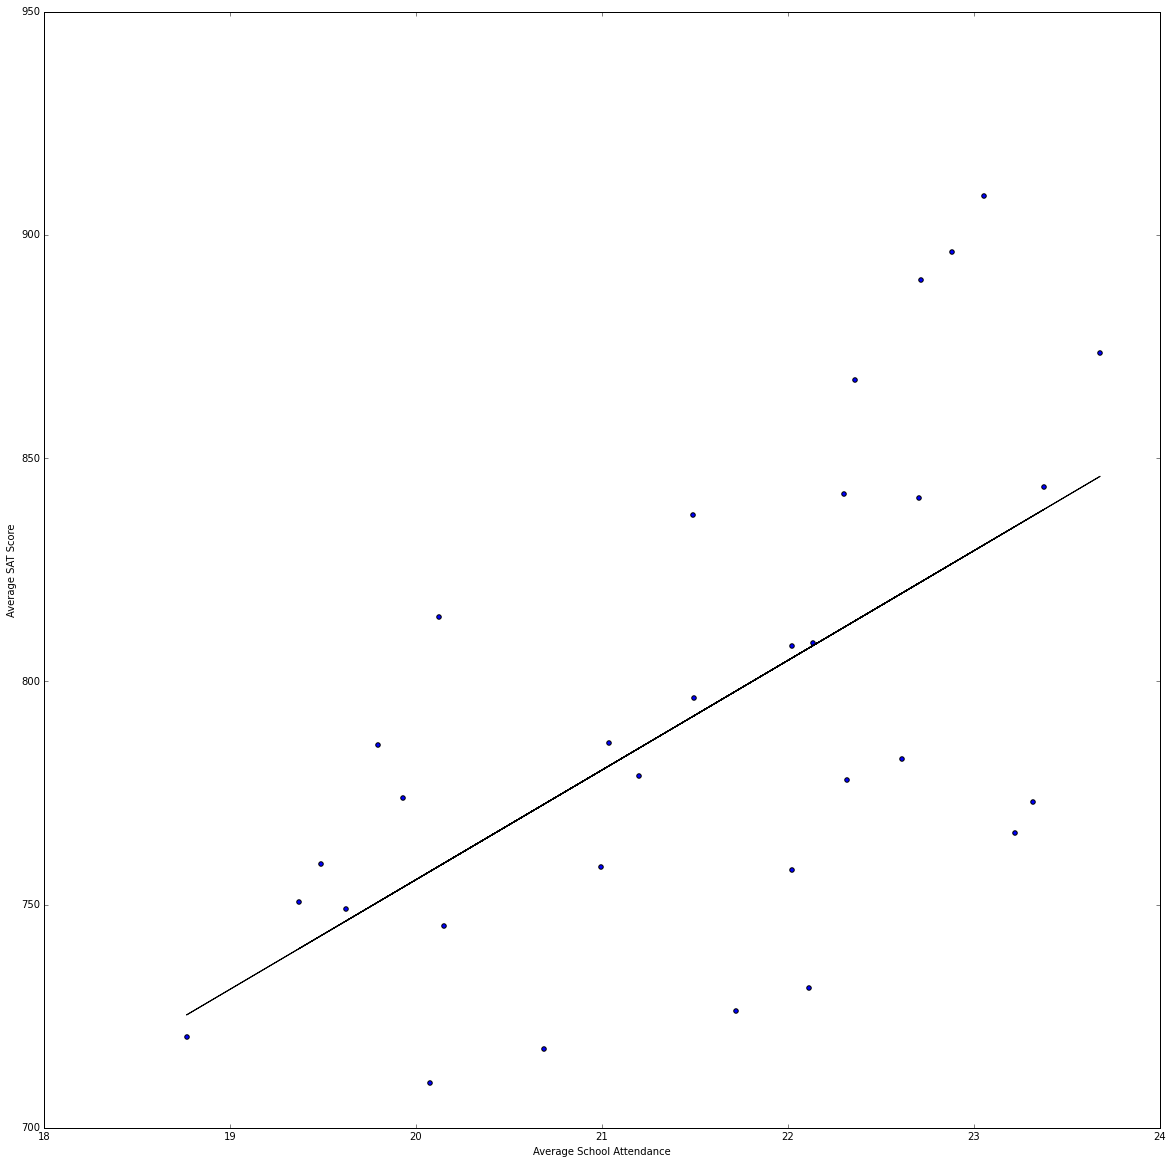

In [183]:
pl.figure(figsize=(20, 20))
pl.scatter(X, Y)
plot(X, fit.predict(), 'k')
pl.ylabel('Average SAT Score')
pl.xlabel('Average School Attendance')